In [ ]:
import pandas as pd

df = pd.read_csv('/content/Csv_file.csv')
print("Столбцы датасета:\n", df.columns.tolist())

df = df.rename(columns={'normal': 'Label'})

print(df['Label'].value_counts())


Столбцы датасета:
 ['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18', '2', '2.1', '0.19', '0.20', '0.21', '0.22', '1', '0.23', '0.24', '150', '25', '0.17', '0.03', '0.17.1', '0.25', '0.26', '0.27', '0.05', '0.28', 'normal']
Label
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
print("Типы данных после кодирования:\n", df.dtypes)


Типы данных после кодирования:
 0             int64
tcp           int64
ftp_data      int64
SF            int64
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.19        float64
0.20        float64
0.21        float64
0.22        float64
1           float64
0.23        float64
0.24        float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.25        float64
0.26        float64
0.27        float64
0.05        float64
0.28        float64
Label         int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Label'])
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} обучена.")


Random Forest обучена.
Decision Tree обучена.
KNN обучена.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:40:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost обучена.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=1),
        'F1 Score': f1_score(y_test, y_pred, average='macro', zero_division=1)
    }

results_df = pd.DataFrame(results).T
print(results_df)


               Accuracy  Precision    Recall  F1 Score
Random Forest  0.998611   0.927869  0.726277  0.731451
Decision Tree  0.998015   0.803950  0.765400  0.714492
KNN            0.995555   0.968291  0.762698  0.769380
XGBoost        0.998889   0.922062  0.787199  0.782664


In [ ]:
from sklearn.metrics import (
    roc_auc_score, log_loss, cohen_kappa_score,
    matthews_corrcoef, balanced_accuracy_score,
    hamming_loss
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Предобработка
df = pd.read_csv("/content/Csv_file.csv")
df = df.dropna()

# Кодирование категориальных данных
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Делим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модели
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Функция вычисления дополнительных метрик
def extended_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    return {
        "ROC AUC": roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else np.nan,
        "Log Loss": log_loss(y_test, y_proba) if y_proba is not None else np.nan,
        "Cohen's Kappa": cohen_kappa_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Hamming Loss": hamming_loss(y_test, y_pred),
    }

# Расчёт
extended_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    extended_results[name] = extended_metrics(model, X_test, y_test)

extended_results_df = pd.DataFrame(extended_results).T
extended_results_df.round(6)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,ROC AUC,Log Loss,Cohen's Kappa,MCC,Balanced Accuracy,Hamming Loss
Random Forest,0.973422,0.011616,0.997167,0.997168,0.705416,0.001720
Decision Tree,0.893663,0.087781,0.995905,0.995906,0.785957,0.002487
KNN,0.871144,0.159316,0.976991,0.977005,0.654796,0.013971
XGBoost,0.998002,0.005688,0.997778,0.997778,0.734917,0.001349


from matplotlib import pyplot as plt
_df_0['ROC AUC'].plot(kind='hist', bins=20, title='ROC AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Log Loss'].plot(kind='hist', bins=20, title='Log Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2["Cohen's Kappa"].plot(kind='hist', bins=20, title="Cohen's Kappa")
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MCC'].plot(kind='hist', bins=20, title='MCC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ROC AUC', y='Log Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Log Loss', y="Cohen's Kappa", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x="Cohen's Kappa", y='MCC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='MCC', y='Balanced Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ROC AUC'].plot(kind='line', figsize=(8, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Log Loss'].plot(kind='line', figsize=(8, 4), title='Log Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11["Cohen's Kappa"].plot(kind='line', figsize=(8, 4), title="Cohen's Kappa")
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['MCC'].plot(kind='line', figsize=(8, 4), title='MCC')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='ROC AUC', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Log Loss', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x="Cohen's Kappa", y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='MCC', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Перезапуск: повторно импортируем и анализируем CSV файл
import pandas as pd

# Загрузка файла
df = pd.read_csv("/content/Csv_file.csv")

# Получение количества уникальных значений в последнем столбце (label)
label_counts = df.iloc[:, -1].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']
label_counts


,Label,Count
0,normal,67342
1,neptune,41214
2,satan,3633
3,ipsweep,3599
4,portsweep,2931
5,smurf,2646
6,nmap,1493
7,back,956
8,teardrop,892
9,warezclient,890


In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}: Unique predictions: {set(y_pred)}")


Random Forest: Unique predictions: {np.int64(0), np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(9), np.int64(10), np.int64(11), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(20), np.int64(21), np.int64(22)}
Decision Tree: Unique predictions: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(9), np.int64(10), np.int64(11), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(20), np.int64(21), np.int64(22)}
KNN: Unique predictions: {np.int64(0), np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(9), np.int64(10), np.int64(11), np.int64(13), np.int64(14), np.int64(15), np.int64(17), np.int64(18), np.int64(20), np.int64(21), np.int64(22)}
XGBoost: Unique predictions: {np.int64(0), np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(9), np.int64(10), np.int64(11), np.int64(13), np.int

In [ ]:
print(y_test.value_counts())


Label
11    13469
9      8243
17      727
5       720
15      586
18      529
10      299
0       191
21      178
20      178
14       40
3        11
1         6
6         4
22        4
2         2
7         2
4         2
16        2
8         1
13        1
Name: count, dtype: int64


In [ ]:
unique_classes_predicted = set()
for name, model in models.items():
    y_pred = model.predict(X_test)
    unique_classes_predicted.update(y_pred)

missing_classes = set(y_test.unique()) - unique_classes_predicted
print("Классы, которые не предсказаны ни одной моделью:", missing_classes)


Классы, которые не предсказаны ни одной моделью: {np.int64(8)}


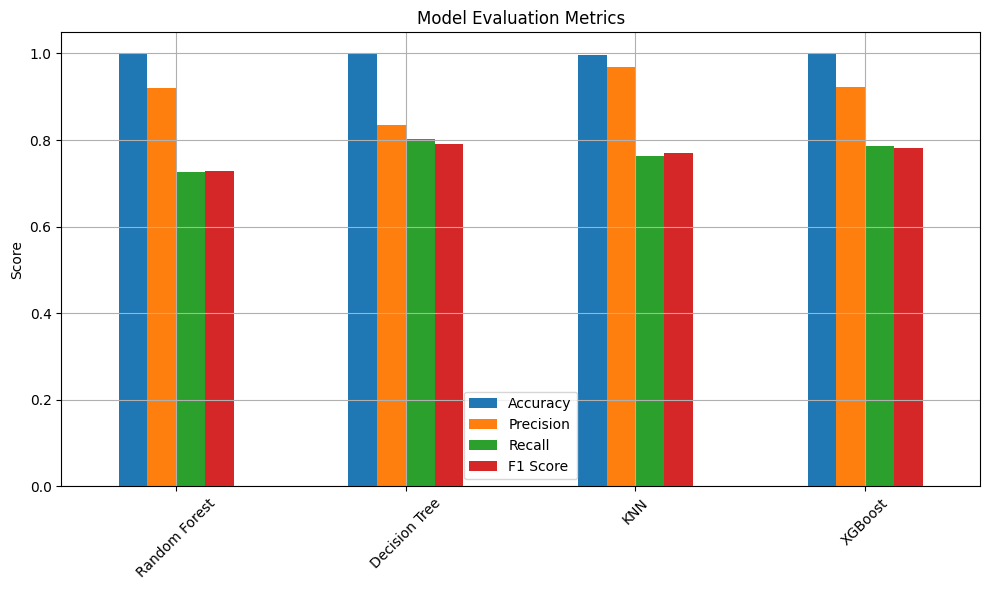

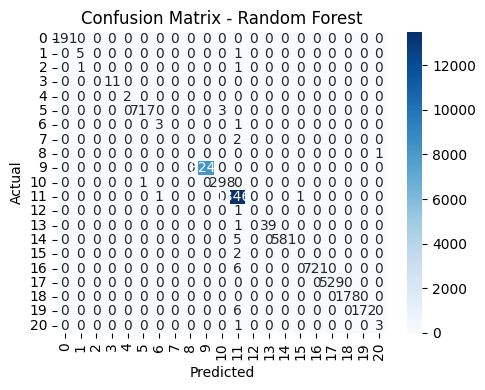

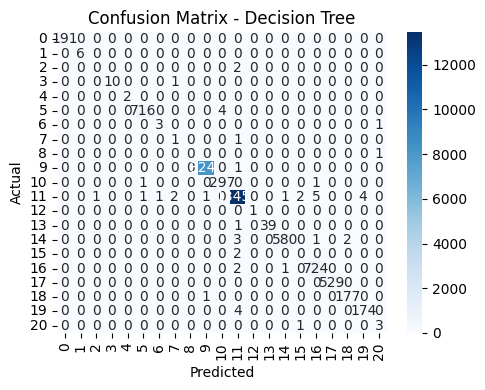

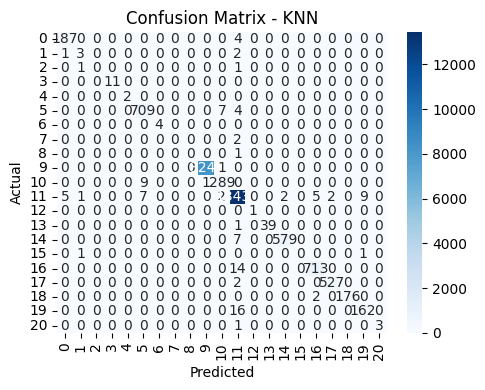

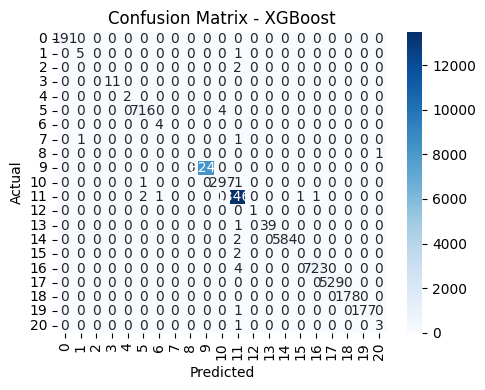

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('bar_chart.png')
plt.show()


for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'conf_matrix_{name.replace(" ", "_")}.png')
    plt.show()


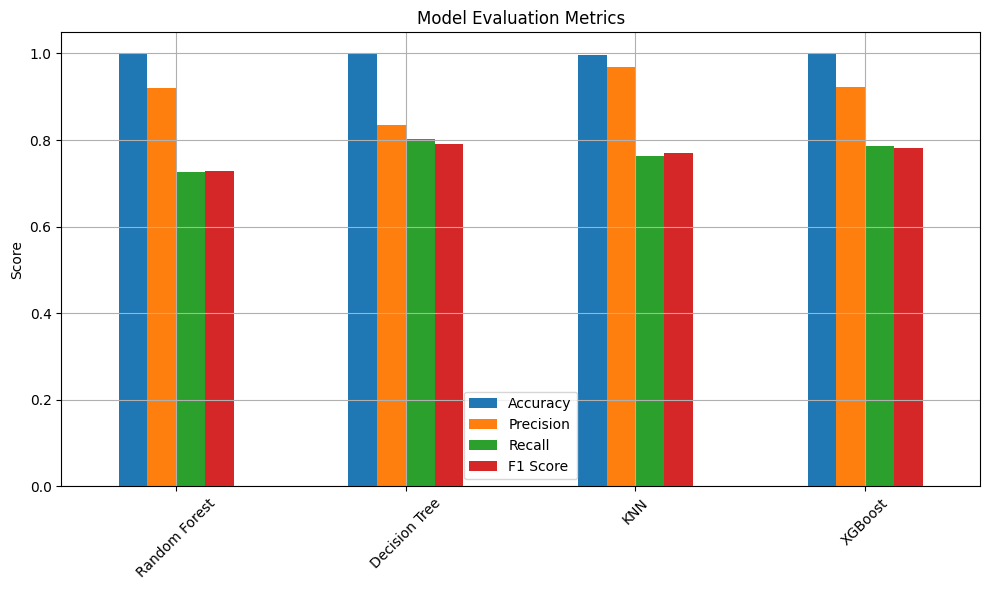

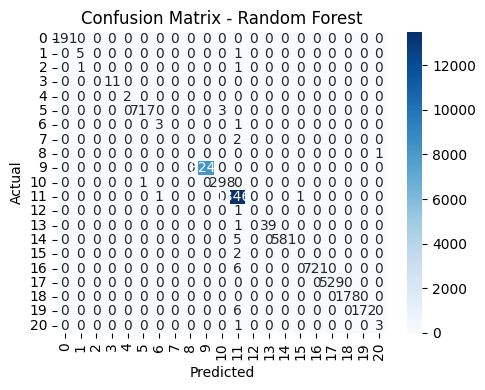

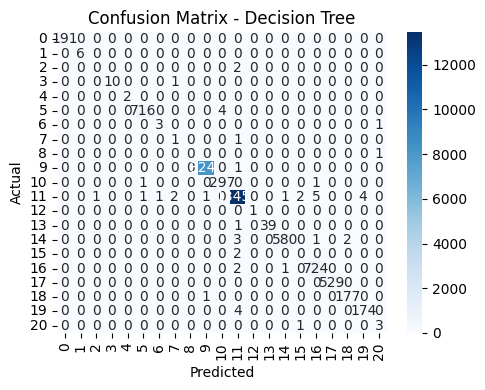

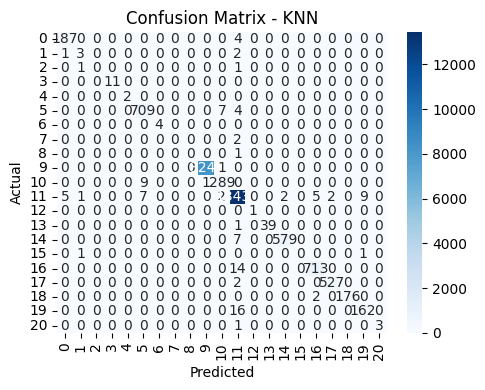

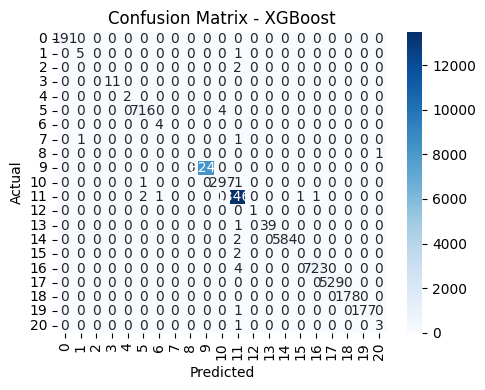

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('bar_chart.png')
plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'conf_matrix_{name.replace(" ", "_")}.png')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Csv_file.csv")

df.columns.values[-1] = 'Label'

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['Label'])
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    }

results = {}
for name, model in models.items():
    results[name] = evaluate(model, X_test, y_test)

results_df = pd.DataFrame(results).T
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,Accuracy,Precision,Recall,F1-score
Random Forest,0.998611,0.998336,0.998611,0.998469
Decision Tree,0.998055,0.998093,0.998055,0.998068
KNN,0.995555,0.995270,0.995555,0.995405
XGBoost,0.998889,0.998660,0.998889,0.998772


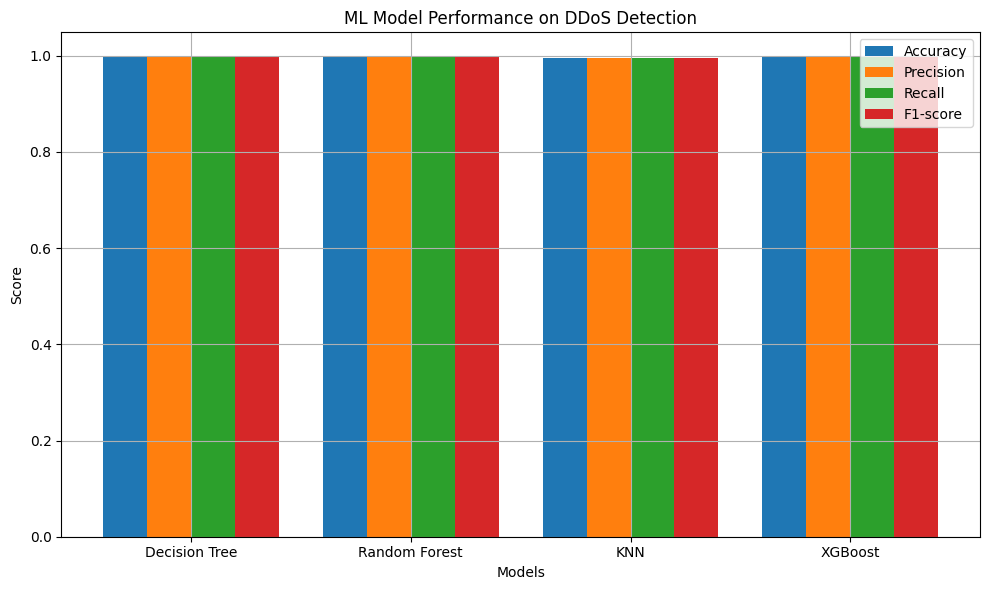

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models_names = results_df.index
accuracy = results_df['Accuracy']
precision = results_df['Precision']
recall = results_df['Recall']
f1 = results_df['F1-score']

x = np.arange(len(models_names))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('ML Model Performance on DDoS Detection')
plt.xticks(x, models_names)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("model_comparison_chart.png", dpi=300)
plt.show()


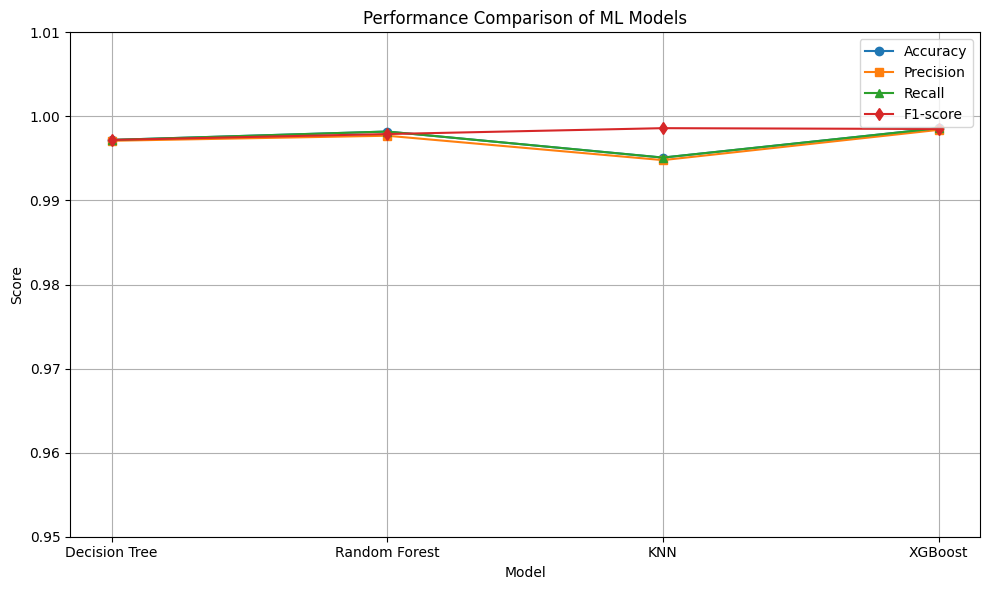

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'KNN', 'XGBoost']
accuracy = [0.9972, 0.9982, 0.9951, 0.9986]
precision = [0.9971, 0.9977, 0.9948, 0.9984]
recall = [0.9972, 0.9982, 0.9951, 0.9986]
f1 = [0.9972, 0.9979, 0.9986, 0.9985]


x = range(len(models))

plt.figure(figsize=(10,6))
plt.plot(x, accuracy, marker='o', label='Accuracy')
plt.plot(x, precision, marker='s', label='Precision')
plt.plot(x, recall, marker='^', label='Recall')
plt.plot(x, f1, marker='d', label='F1-score')
plt.xticks(x, models)
plt.ylim(0.95, 1.01)
plt.title('Performance Comparison of ML Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
